## Visualization Technique 

### A narrative description of the visualization you are planning to use, describing how it works

In 1854, a Cholera outbreak struck London and killed 500 people. Given the limited medical knowledge of the time, authorities were confounded as to the location. It wasn't until Dr. John Snow collected data on deaths and plotted them on a map that a pattern was observed: most of the deaths occured near the Broad St. water pump (https://www.ph.ucla.edu/epi/snow/mapsbroadstreet.html). Dr. Snow then removed the handle from the pump and saved countless lives (https://www.ph.ucla.edu/epi/snow/broadstreetpump.html). His technique of plotting data points on a map was one of the earliest examples of "geospatial mapping."

Geospatial mapping is a technique that overlays datapoints on a map. The position of the point on the visualization corresponds its real-world location (typically longitude and latitude, but can be converted to another contrived coordinate system), and the size, shape, color, etc. of the point can be changed to convey other metrics. 

### A discussion of in which circumstances this visualization should and should not be used (what is it close to? What else could you consider? How does it relate to specific aspects of data? 

Geospatial mapping can be used when exploring data trends that are suspected of being related to location. Individual points can be plotted on a map, or a map can be broken into regions representing frequencies, densities, boolean values, etc. Plotting individual points can be effective when a quantitative analysis is not needed, and the goal is exploring visual trends. Breaking a map into regions lends itself to quantitative understanding more easily, and may be considered as an alternative when using probability density charts.

Some issues with geospatial mapping:
    1) Collection bias: incorrect conclusions may be drawn from a visualization depending on the methods of data collection. For example, crime data reported by a police department may show that certain area are more prone to crime than others. However, if a bias exists in policing methods (for example, patrolling one area more than another), that bias will be reflected in the data. 
    2) Issues of scale: Varying frequencies of data collection may show an erroneous pattern. For example, a city may have an overall crime rate of 2%, but scaling the map to a specific neighborhood may increase the rate to 4%, giving the illusion of a higher rate. When using geospatial mapping, one should carefully consider sample size.

## Visualization Library 

### The library you are going to use, and a background on why the library is good for this visualization. Who created it? Is it open source? How do you install it? 

The library I will use is called "GeoPandas". GeoPandas was created in 2013 by Kelsey Jordahl, a former professor of physics at Marymount Manhattan College. It is an open-source library, blending together the datatypes used by pandas, geometric operations in shapely, fiona for file access, and matplotlib for plotting. The purpose of GeoPandas is "to make working with geospatial data in python easier" (https://geopandas.org/en/stable/), and is therefore an apt choice for this visualization. 

Several libraries already exist for the purpose of geospatial operations, namely Arcpy, GDAL/OGR, RSGISLib, and PyProj. The advantage of GeoPandas is using the familiar pandas format for easy data manipulation, and its compatability with other python data science packages (http://millermountain.com/geospatialblog/2021/08/17/what-can-geopandas-do-for-you/).

Installation:
Pip installation: pip install geopandas
Conda installation: conda install -c conda-forge geopandas
Link to downloadable installations: https://anaconda.org/conda-forge/geopandas

### A discussion of the general approach and limitations of this library. Is it declarative or procedural? Does it integrate with Jupyter? Why you decided to use this library (especially if there are other options)? 

GeoPandas is is a procedural library, meaning the order of commands is the order of transformations performed on the data. This is important, as the order of matrix operations (in this case, a dataframe) affects the result. 

GeoPandas integrates well with Jupyter. Simply by using the magic command !pip install geopandas, all dependencies are installed. Additionally, newer patches of GeoPandas were designed with Jupyter notebook visualizations in mind, and thus render well compared to other IDEs (https://hub.packtpub.com/libraries-for-geospatial-analysis/).

I chose GeoPandas because it supports the well known pandas dataframe structure, meaning all pandas operations are valid (loc, iloc, merge, apply etc.). It has excellent documentation and examples, and is primarily used for visualizations, compared to other libraries which rely more heavily on vector operations but are lacking in visualizations (https://hub.packtpub.com/libraries-for-geospatial-analysis/).

Some limitations of GeoPandas are the large number of dependencies. GeoPandas is dependent on numpy, pandas, shapely, fiona, six, pyproj, matplotlib, descartes, and pysal. There may exist backwards compatibility issues depending on versions of libraries. 


## Demonstration 


### The dataset you picked and instructions for cleaning the dataset. You should pick a suitable dataset to demonstrate the technique, toolkit, and problem you are facing. 

For this visualization, I'm interested in visually exploring the density of seasonal flu-vaccine availability centers in New York City. Because vaccine centers bring awareness and prevention measures, underserved neighborhoods could potentially be the source of a flu hotspot. Additionally, senior citizens and disabled persons may not be able or willing to travel to obtain a vaccine, thereby increasing their risk of exposure to and spread of the flu. Identifying underserved areas and implementing the proper corrective measures can help boost public health and reduce mortality. 


Census and Census Block Datasets: https://www.kaggle.com/datasets/muonneutrino/new-york-city-census-data?select=census_block_loc.csv

Neighborhood Delineation map: https://github.com/veltman/snd3/blob/master/data/nyc-neighborhoods.geo.json

Flu center data: https://data.cityofnewyork.us/Health/New-York-City-Locations-Providing-Seasonal-Flu-Vac/w9ei-idxz



Let's start by installing GeoPandas

In [2]:
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 93.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 101.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 144.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 82.8 MB/s eta 0:00:00


Let's import the packages that will be needed

In [3]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np

Load up the data

In [4]:
census_block_data = gpd.read_file(r'census_block_loc.csv')
nyc_census_data = gpd.read_file(r'nyc_census_tracts.csv')
neighborhood_area_data = gpd.read_file(r'nyc-neighborhoods.geo.json')
flu_center_data = gpd.read_file(r'New_York_City_Locations_Providing_Seasonal_Flu_Vaccinations.csv')

Let's filter the census data to only include NYC, and match up the neighborhood populations

In [5]:
#A census block is a numerical code for the location the data represents. We can first filter out all data that doesn't belong to New York City by
#county. There are 5 counties in NYC: Queens, New York (Manhattan), Kings (Brooklyn), Bronx, and Richmond (Staten Island). 
census_block_data = census_block_data[census_block_data.County.isin(['Queens','New York','Kings','Bronx','Richmond'])]

#limit the state to NY in case there is a county in another state with the same name
census_block_data = census_block_data[census_block_data['State'] == 'NY']

#for some reason, the numerical values are not read as an integers. Recasting is important for the next step
census_block_data['BlockCode'] = census_block_data['BlockCode'].astype(int)

#The NYC census data (nyc_census_data) uses block codes where the first 11 digits match the census block codes (census_block_data). We can get rid of 
#the last 4 digits with a floor divide so they match up.
census_block_data['BlockCode'] = census_block_data['BlockCode'] // 10000

#recast as an int again
nyc_census_data['CensusTract'] = nyc_census_data['CensusTract'].astype(int)

#finally we can match the population numbers with the census region by Block Code
combined_data = census_block_data.merge(nyc_census_data, left_on = 'BlockCode', right_on = 'CensusTract')
combined_data['TotalPop'] = combined_data['TotalPop'].astype(int)
combined_data.head()

,Latitude,Longitude,BlockCode,County_x,State,geometry_x,CensusTract,County_y,Borough,TotalPop,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,geometry_y
0,40.48,-74.2325125628,36085990100,Richmond,NY,None,36085990100,Richmond,Staten Island,0,...,,,,0,,,,,,None
1,40.48,-74.2293467337,36085990100,Richmond,NY,None,36085990100,Richmond,Staten Island,0,...,,,,0,,,,,,None
2,40.48,-74.2261809045,36085990100,Richmond,NY,None,36085990100,Richmond,Staten Island,0,...,,,,0,,,,,,None
3,40.48,-74.2230150754,36085990100,Richmond,NY,None,36085990100,Richmond,Staten Island,0,...,,,,0,,,,,,None
4,40.48,-74.2198492462,36085990100,Richmond,NY,None,36085990100,Richmond,Staten Island,0,...,,,,0,,,,,,None


In [6]:
#As you can see, there are multiple entries with the same block code. 
#Each block code can reference the total population within the block, so multiple entries with the same block code are redundant. 
combined_data = combined_data.drop_duplicates(subset='BlockCode').reset_index(drop=True)

In [7]:
combined_data.head()

,Latitude,Longitude,BlockCode,County_x,State,geometry_x,CensusTract,County_y,Borough,TotalPop,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,geometry_y
0,40.48,-74.2325125628,36085990100,Richmond,NY,None,36085990100,Richmond,Staten Island,0,...,,,,0,,,,,,None
1,40.4913065327,-73.8874371859,36081990100,Queens,NY,None,36081990100,Queens,Queens,0,...,,,,0,,,,,,None
2,40.493567839200004,-74.25150753770001,36085024402,Richmond,NY,None,36085024402,Richmond,Staten Island,4241,...,0.6,4.0,44.3,2046,75.2,21.2,3.6,0.0,8.3,None
3,40.4980904523,-74.2198492462,36085019800,Richmond,NY,None,36085019800,Richmond,Staten Island,6690,...,0.5,1.9,39.0,3104,78.3,16.7,5.0,0.0,3.2,None
4,40.502613065300004,-74.257839196,36085024401,Richmond,NY,None,36085024401,Richmond,Staten Island,6408,...,0.0,3.9,44.6,2703,70.2,29.3,0.6,0.0,6.6,None


We've now matched area populations to longitude and latitude points.

Let's take a look at the neighborhood area data. A note about the meaning of neighborhood:
'Neighborhoods' in NYC are not strictly defined. Some New Yorkers will claim certain neighborhoods start and stop on certain streets; others will give a more vague definition. I chose to work with neighborhoods because neighborhood names convey general area meaning better than a census block number. I'm using neighborhood lines drawn by a github user, but this is by no means a definitive declaration of where neighborhoods start and stop. 

A note about the data: 
GeoPandas Dataframes often have a column that references latitude and longitude coordinates. This is called the geometry of the dataframe. Tradiationally, the column that contains the geometry is aptly named 'geometry', although it can be named anything. The geometry of the dataframe can contain points, polygons, or multipolygons. By declaring a column as the geometry, the .plot() function knows where to go to access the shape data that is to be plotted. 

In [8]:
neighborhood_area_data.head()

,id,name,geometry
0,Todt_Hill_Emerson_Hill_Heartland_Village_Light...,Todt Hill-Emerson Hill-Heartland Village-Light...,"MULTIPOLYGON (((-74.15102 40.59016, -74.14974 ..."
1,New_Springville_Bloomfield_Travis,New Springville-Bloomfield-Travis,"MULTIPOLYGON (((-74.14591 40.58856, -74.14813 ..."
2,Westerleigh,Westerleigh,"MULTIPOLYGON (((-74.13896 40.61616, -74.13869 ..."
3,Breezy_Point_Belle_Harbor_Rockaway_Park_Broad_...,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,"MULTIPOLYGON (((-73.88976 40.56575, -73.89132 ..."
4,Hammels_Arverne_Edgemere,Hammels-Arverne-Edgemere,"MULTIPOLYGON (((-73.81575 40.58374, -73.81775 ..."


You can see here that the geometry column contains MULTIPOLYGON objects. 

Now we want to assign populations to each neighborhood to generate a population map. We'll use this map and underlying data to scale the flu center data: if a high population area doesn't have a lot of flu centers, it is underserved, and vice-versa. 

In [9]:
#we don't know the populations yet, so let's initialize a 'Population' column of 0.
neighborhood_area_data['Population'] = 0

#Here, we will convert from census blocks to neighborhoods. There will be some differences from actual values because, as previous mentioned, NYC
#neighborhoods are not strictly defined. However, there is enough granularity in the neighborhood definitions to avoid large deviations.
#For each entry in our combined_data dataframe (containing location and population data, hence 'combined') we want to assign that population to a 
#neighborhood. We will take each area and iterate through the neighborhood list until a match is found based on the geometry, then add that population
#to the running total ('Population' column).

for i in range(len(combined_data)):
    point = Point(combined_data.iloc[i]['Longitude'], combined_data.iloc[i]['Latitude'])
    found_neighborhood = False
    
    for j in range(len(neighborhood_area_data)):
        
#the .contains() function is particulary useful. If a shapely Point is passed into the function, GeoPandas will check if that point lies within the 
#given polygon and return a boolean value. We only want to add the neighborhood population once, so flag variable found_neighborhood lets us do that.
        if neighborhood_area_data.iloc[j]['geometry'].contains(point):
            neighborhood_area_data.loc[j, 'Population'] += combined_data.iloc[i]['TotalPop']
            found_neighborhood = True
        
        if found_neighborhood:
            break

#let's take a look at the dataframe
neighborhood_area_data.head()

,id,name,geometry,Population
0,Todt_Hill_Emerson_Hill_Heartland_Village_Light...,Todt Hill-Emerson Hill-Heartland Village-Light...,"MULTIPOLYGON (((-74.15102 40.59016, -74.14974 ...",46833
1,New_Springville_Bloomfield_Travis,New Springville-Bloomfield-Travis,"MULTIPOLYGON (((-74.14591 40.58856, -74.14813 ...",33867
2,Westerleigh,Westerleigh,"MULTIPOLYGON (((-74.13896 40.61616, -74.13869 ...",15078
3,Breezy_Point_Belle_Harbor_Rockaway_Park_Broad_...,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,"MULTIPOLYGON (((-73.88976 40.56575, -73.89132 ...",13274
4,Hammels_Arverne_Edgemere,Hammels-Arverne-Edgemere,"MULTIPOLYGON (((-73.81575 40.58374, -73.81775 ...",8738


So now each neighborhood has a population assigned to it. Some neighborhoods show 0 population. In reality, this is probably not the case, but an artifact of defining the neighborhoods rigidly.

Now we can visualize our population map.

### The quality of your demonstration. First demonstrate the basics of this approach, then show a few of the edges of how the library might be used for other cases. This is the "meat" of the assignment. 

Text(59.41560766228251, 0.5, 'Latitude')

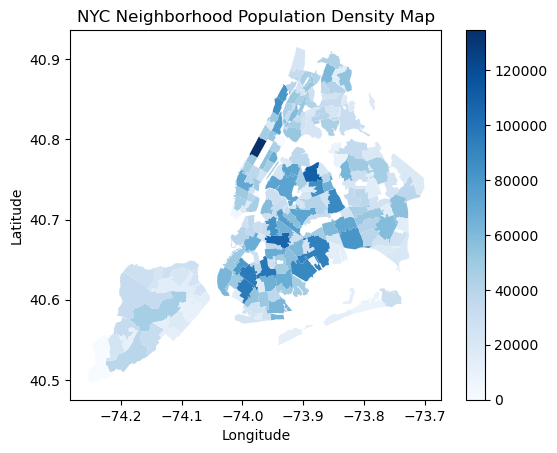

In [10]:
#plotting with GeoPandas uses matplotlib. Pass in the data to be reflected by using the column parameter.

neighborhood_area_data.plot(column='Population', cmap='Blues', legend=True)
plt.title('NYC Neighborhood Population Density Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')



At a glance, the map makes intuitive sense. The city is not very populated on Staten Island (perhaps it's more difficult to get things done on an island). Brooklyn is heavily populated (Brooklyn has a perception of being a 'cool' place). The seemingly most populated place on the map is directly next to Central Park (if money was no object, where would you live in NYC?). Based off of this map, I expect flu centers to be concentrated in Brooklyn and the Central Park area. Let's see if that's the case.

In [11]:
#similar to the procedure above, we will add a running total of the number of centers in each neighborhood called 'Num Centers' initialized at 0 to be
#used later. We will also combined the latitude and longitude values into a shapely Point object, and store that in a new column in our flu center 
#dataframe called 'geometry' to be used for individual plotting.

neighborhood_area_data['Num Centers'] = 0
flu_center_data['geometry'] = None
for i in range(len(flu_center_data)):
    flu_center_data['geometry'][i] = Point(flu_center_data.iloc[i]['Longitude'], flu_center_data.iloc[i]['Latitude'])
    point = flu_center_data.iloc[i]['geometry']
    found_neighborhood = False
    
    for j in range(len(neighborhood_area_data)):
        if neighborhood_area_data.iloc[j]['geometry'].contains(point):
            neighborhood_area_data.loc[j, 'Num Centers'] += 1
            found_neighborhood = True
        
        if found_neighborhood:
            break


Text(33.722222222222214, 0.5, 'Latitude')

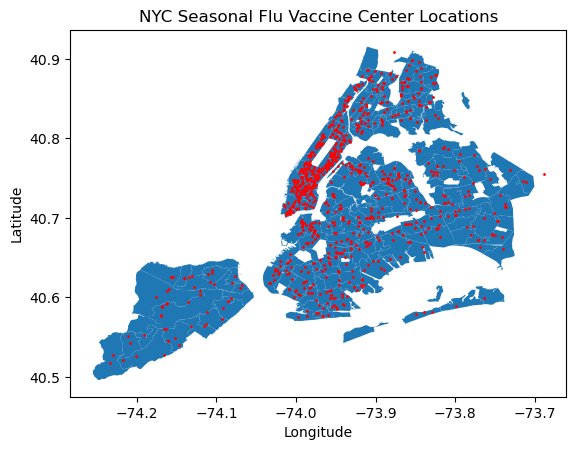

In [12]:
#the plotting procedure is nearly the same as above, with a few minor details

#declare the 'geometry' column as the geometry of the dataframe
flu_center_data = gpd.GeoDataFrame(flu_center_data, geometry='geometry')

#plot the neighborhood map
neighborhood_area_data.plot()

#plot the points: the ax parameter specifies which axis to plot on. By passing in plt.gca(), we can plot on the same plot in memory.
#.gca() stands for 'get current axis'. Markersize and type can be adjusted for aesthetics.
flu_center_data.plot(ax = plt.gca(), color='red', markersize = 1)
plt.title('NYC Seasonal Flu Vaccine Center Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Surprisingly, most flu centers seem to be visually concentrated in downtown Manhattan, but visually spread out evenly everywhere else. 

Now let's normalize our data to the population by calculating the number of centers per 100000 residents. 

In [13]:
#Let's create a new column 'Centers per 100000' and perform the appropriate calculation
neighborhood_area_data['Centers per 100000'] = (neighborhood_area_data['Num Centers'] / neighborhood_area_data['Population'])*100000

#because some neighborhoods artificially have a population of 0 on our map, some 'Centers per 100000' values will be infinity (divide by 0). Let's 
#remove those
neighborhood_area_data['Centers per 100000'] = neighborhood_area_data['Centers per 100000'].replace([np.inf, -np.inf], np.nan)

Text(59.24801484775128, 0.5, 'Latitude')

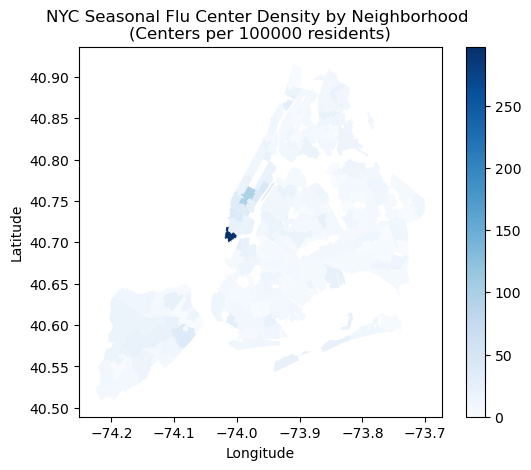

In [14]:
#plot the flu center density map
neighborhood_area_data.plot(column='Centers per 100000', cmap = 'Blues', legend = True)
plt.title('NYC Seasonal Flu Center Density by Neighborhood \n(Centers per 100000 residents)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

The two places that immediately 'pop out' are Midtown and Battery Park. Let's see if they're outliers (defined by z-score > 2)

In [15]:
#let's create a column for the z scores, calculated with the formula (x - mean) / std. dev
neighborhood_area_data['zscores'] = (neighborhood_area_data['Centers per 100000']-neighborhood_area_data['Centers per 100000'].mean()) / neighborhood_area_data['Centers per 100000'].std()

#filter to only have positive outliers
pos_outliers = neighborhood_area_data[neighborhood_area_data['zscores'] > 2]
pos_outliers.head()

,id,name,geometry,Population,Num Centers,Centers per 100000,zscores
124,Battery_Park_City_Lower_Manhattan,Battery Park City-Lower Manhattan,"MULTIPOLYGON (((-74.01417 40.70459, -74.01444 ...",4374,13,297.210791,12.121016
132,Midtown_Midtown_South,Midtown-Midtown South,"MULTIPOLYGON (((-73.98572 40.76293, -73.98472 ...",37649,36,95.620070,3.528849


Indeed they are, with z-scores of 12.1 for Battery Park and 3.5 for Midtown. This begs the question: are these areas overserved? Could resources be better utilized elsewhere?

Text(96.2469458692586, 0.5, 'Latitude')

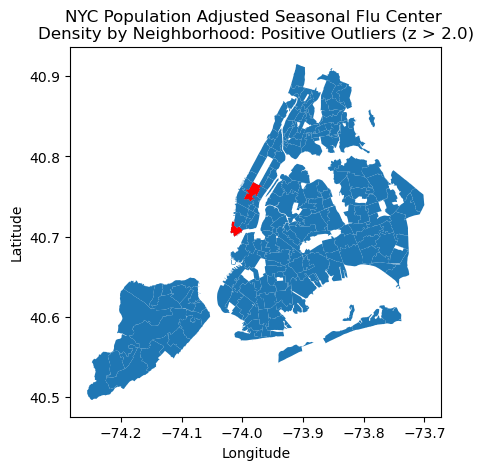

In [16]:
#plot the outliers on the map
neighborhood_area_data.plot()
pos_outliers.plot(ax=plt.gca(), color='red')
plt.title('NYC Population Adjusted Seasonal Flu Center \nDensity by Neighborhood: Positive Outliers (z > 2.0)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Let's try removing those outliers and re analyzing the dataframe to get a better idea of what's happening elsewhere.

In [20]:
#drop outliers
neighborhood_area_data = neighborhood_area_data.drop(pos_outliers.index)

Text(59.24801484775128, 0.5, 'Latitude')

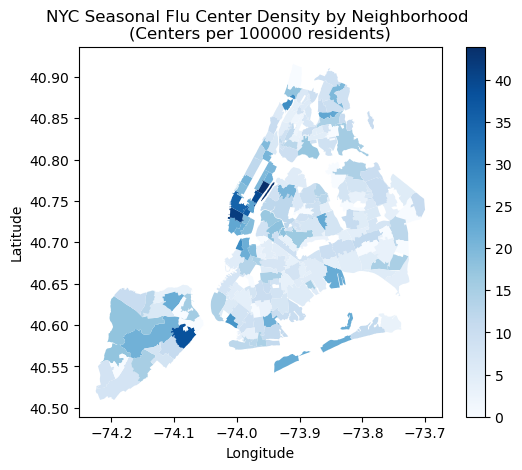

In [21]:
#recalculate z-scores
neighborhood_area_data['zscores'] = (neighborhood_area_data['Centers per 100000']-neighborhood_area_data['Centers per 100000'].mean()) / neighborhood_area_data['Centers per 100000'].std()

neighborhood_area_data.plot(column='Centers per 100000', cmap = 'Blues', legend = True)
plt.title('NYC Seasonal Flu Center Density by Neighborhood \n(Centers per 100000 residents)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Interesting. Midtown Manhattan seems to have the highest density of vaccine centers, along with one neighborhood in Staten Island. Let's look at any negative outliers.

In [22]:
neg_outliers = neighborhood_area_data[neighborhood_area_data['zscores'] < -2]
neg_outliers.head()

,id,name,geometry,Population,Num Centers,Centers per 100000,zscores


There's none! I played around with the parameters, and found that there were no vaccine center z-scores below -1.2 once the outliers are removed.

In [32]:
neg_outliers = neighborhood_area_data[neighborhood_area_data['zscores'] < -1.2]
#let's get the names of these neighborhoods
neg_outliers.name.tolist()

['Bellerose',
 'Queensboro Hill',
 'College Point',
 'Hollis',
 'South Jamaica',
 'Elmhurst-Maspeth',
 'Cambria Heights',
 'Windsor Terrace',
 'Ocean Parkway South',
 'Williamsburg',
 'Grymes Hill-Clifton-Fox Hills',
 'Arden Heights',
 'Grasmere-Arrochar-Ft. Wadsworth',
 'North Riverdale-Fieldston-Riverdale',
 'Westchester-Unionport']

Text(96.22303505803093, 0.5, 'Latitude')

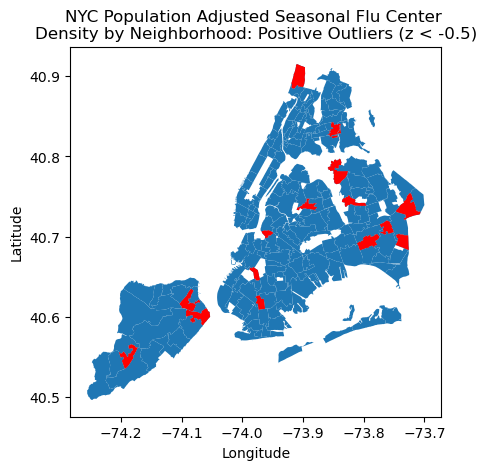

In [33]:
#plot the outliers
neighborhood_area_data.plot()
neg_outliers.plot(ax=plt.gca(), color='red')
plt.title('NYC Population Adjusted Seasonal Flu Center \nDensity by Neighborhood: Positive Outliers (z < -0.5)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

## Conclusion

There is no discernable geographical pattern to the negative outliers. Overall, New York City Seasonal Flu vaccination centers are very evenly spaced in regards to resident population (no negative outliers beyond z = -0.6) with the exception of Battery Park (z = 12.1) and Midtown (z = 3.5), which are overserved. One hypothesis of placement strategy logic is that NYC health officials cater to the number of commuters: If an area receives more commuters, then it will receive more vaccine center placements. Battery Park neighbors the Financial District, and Midtown is a business district. With a high fluctuation of workers everday but relatively low residence numbers, it makes sense to strategically place vaccine centers where workers can easily access them on their morning commute, lunch time, or evening commute. The current strategy adopted by NYC public health officials may benefit from analysis of commuter data. This hypothesis will be explored in another project. 